In [1]:
!pip install scikit-image

In [2]:
#Converting nrrd files into nii files
import os
import nibabel as nib
import numpy as np
from skimage import io

# Set the directory containing your NRRD dataset
dataset_dir = 'content/sample_data/datanrrd'

# Create a directory to save the NIfTI files
output_dir = 'content/sample_data/output'
os.makedirs(output_dir, exist_ok=True)

# Get the list of NRRD files in the dataset directory
nrrd_files = [f for f in os.listdir(dataset_dir) if f.endswith('.nrrd')]

# Loop over each NRRD file in the dataset
for nrrd_file in nrrd_files:
    # Construct the full path to the NRRD file
    nrrd_path = os.path.join(dataset_dir, nrrd_file)

    # Load the NRRD data using scikit-image
    nrrd_data = io.imread(nrrd_path)

    # Extract the data array and header information
    nrrd_array = np.array(nrrd_data, dtype=np.float32)
    nrrd_header = None  # You can provide the header information if available

    # Create a NIfTI image from the data and header
    nifti_img = nib.Nifti1Image(nrrd_array, None, header=nrrd_header)

    # Save the NIfTI image as a file
    nifti_file = nrrd_file.replace('.nrrd', '.nii')
    nifti_path = os.path.join(output_dir, nifti_file)
    nib.save(nifti_img, nifti_path)

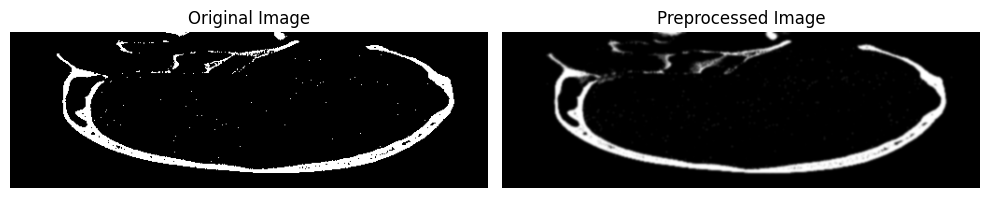

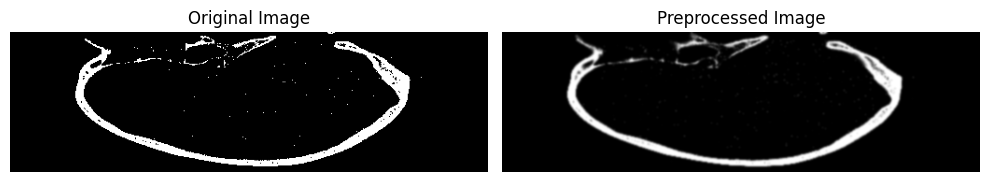

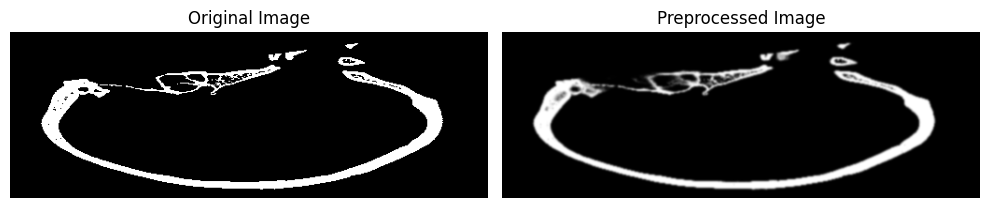

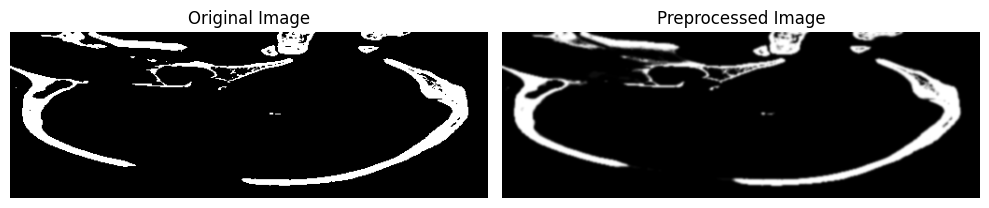

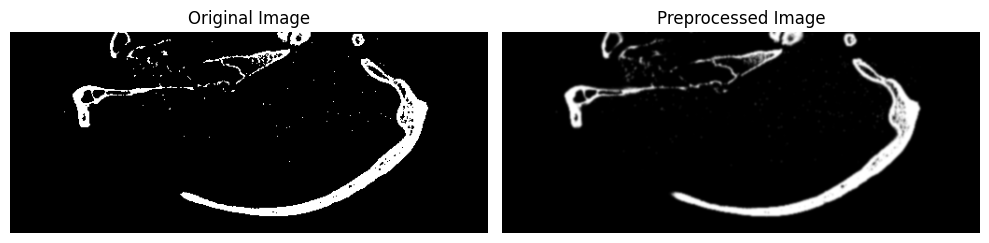

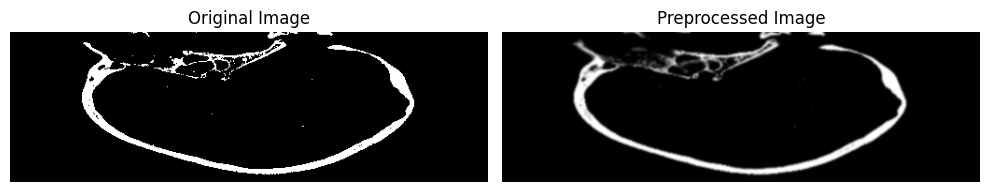

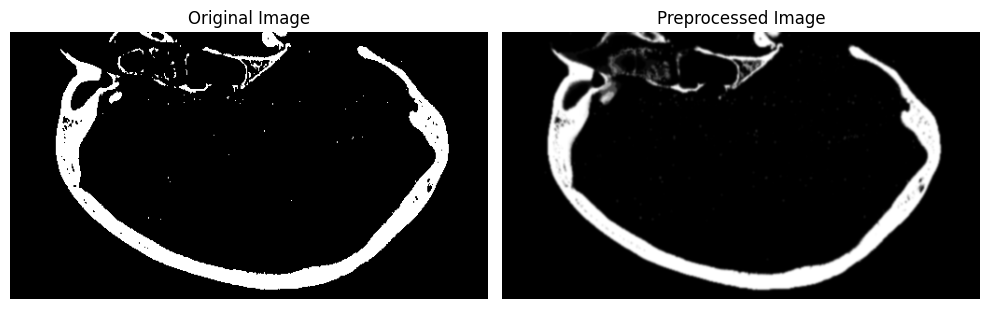

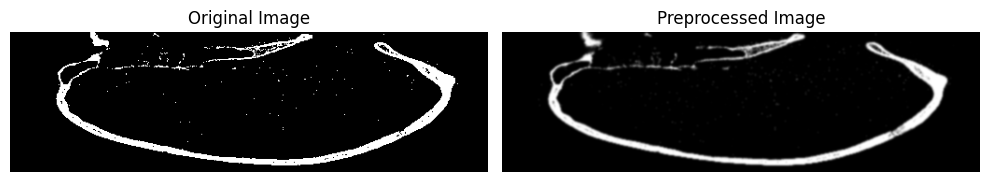

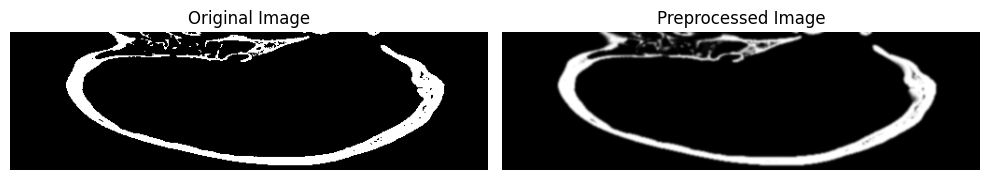

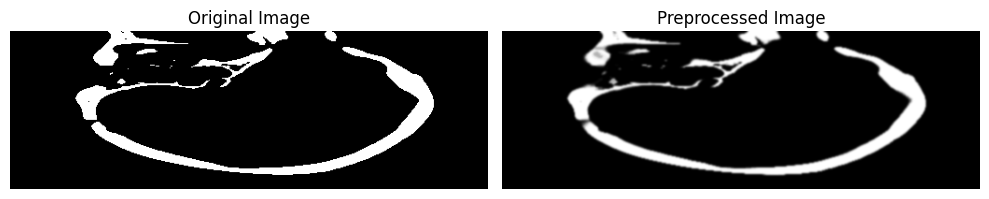

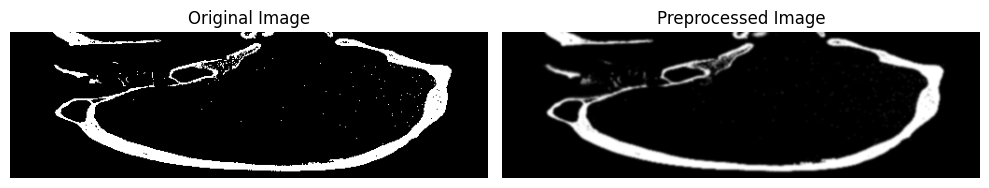

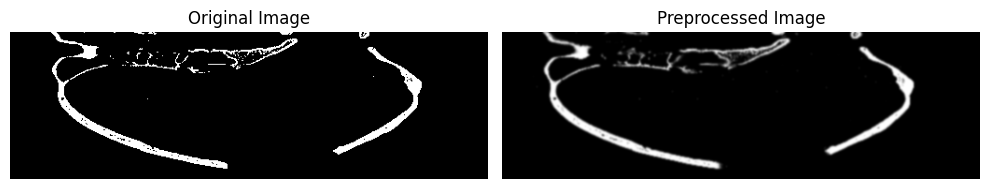

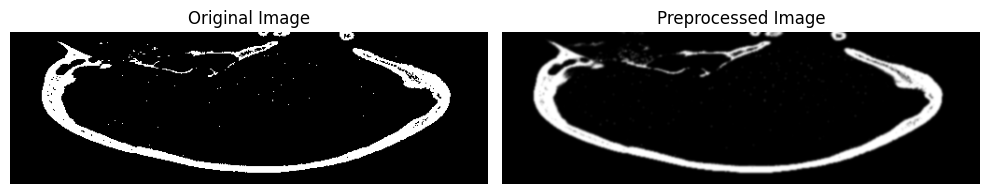

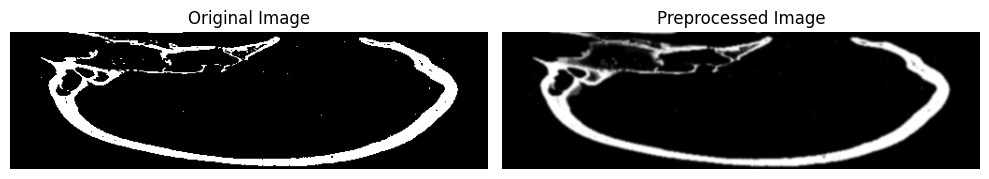

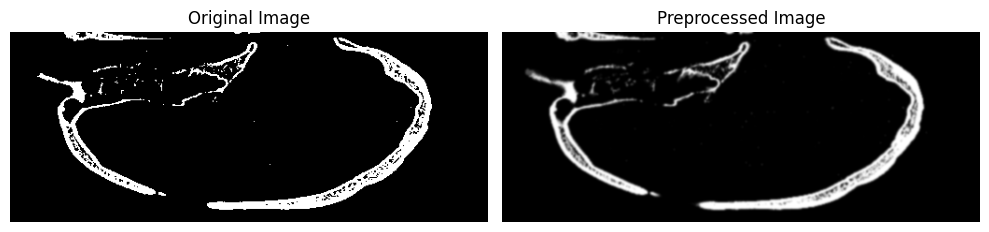

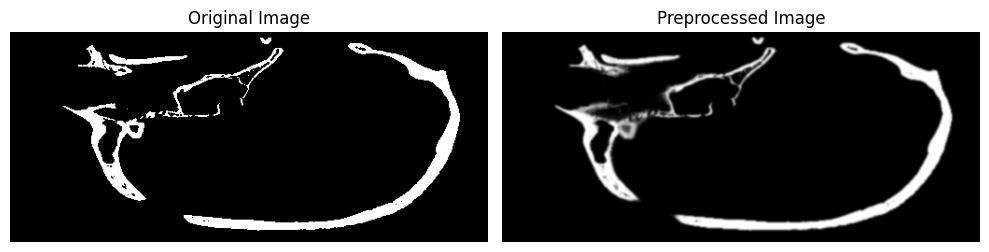

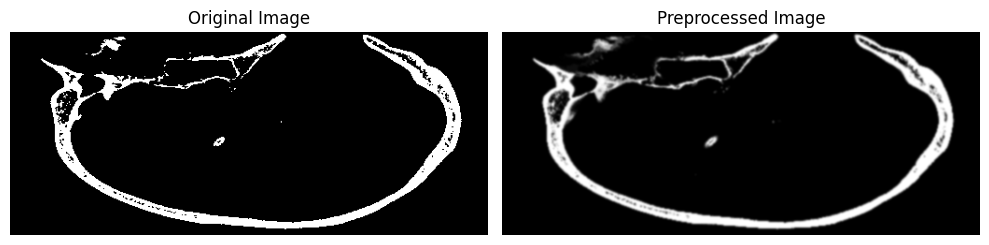

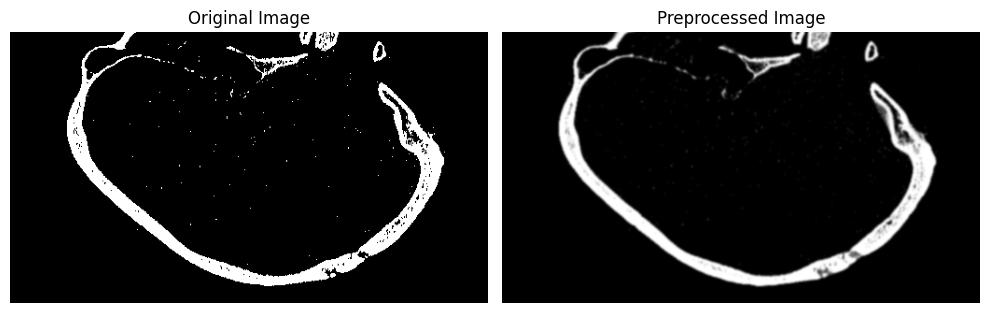

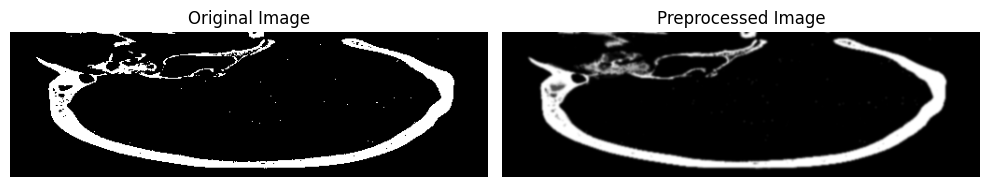

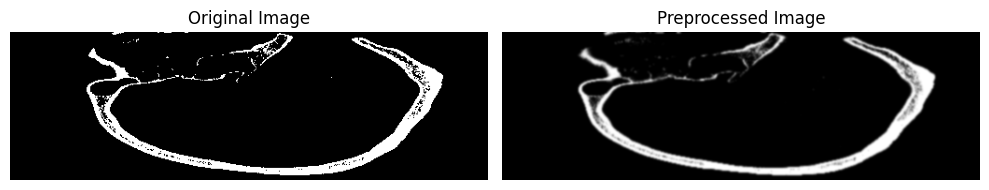

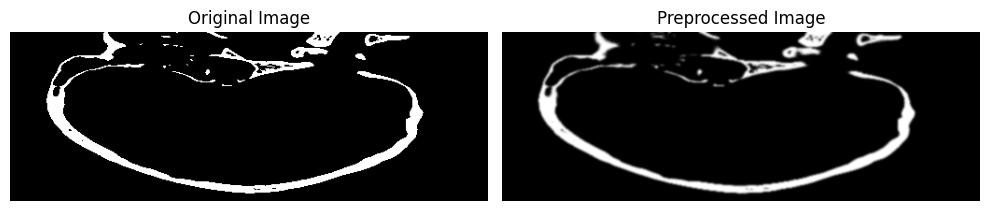

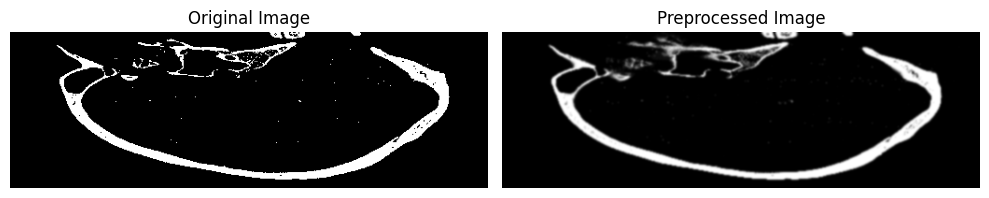

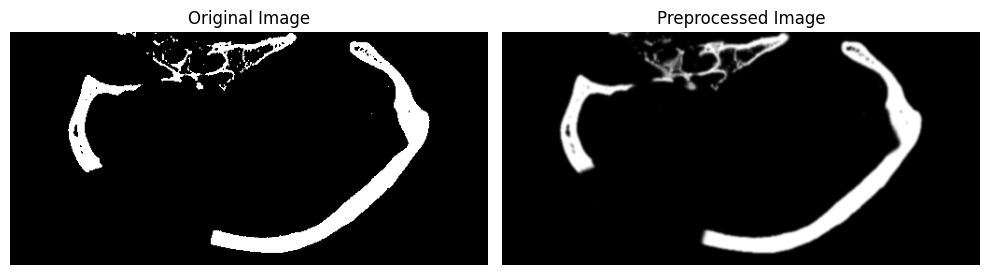

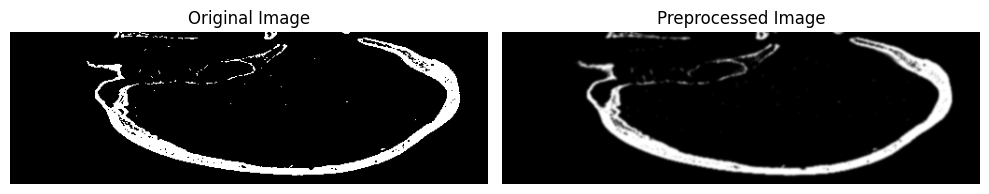

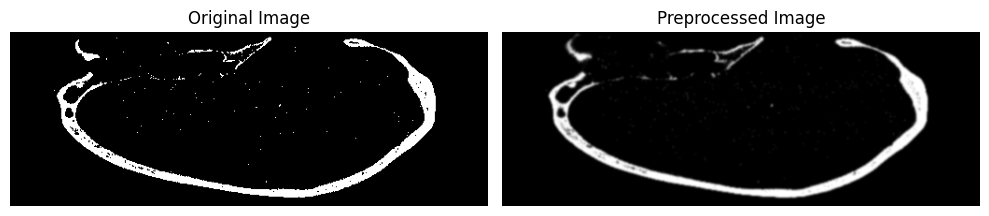

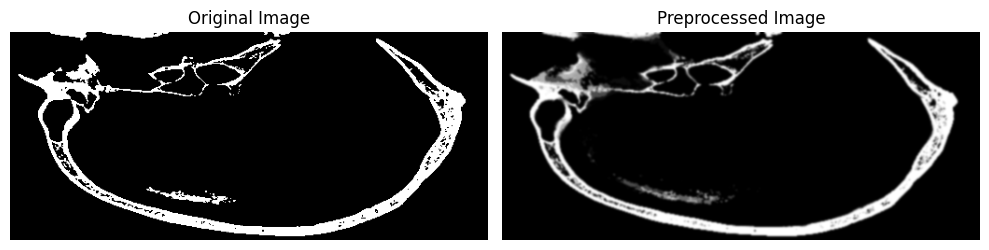

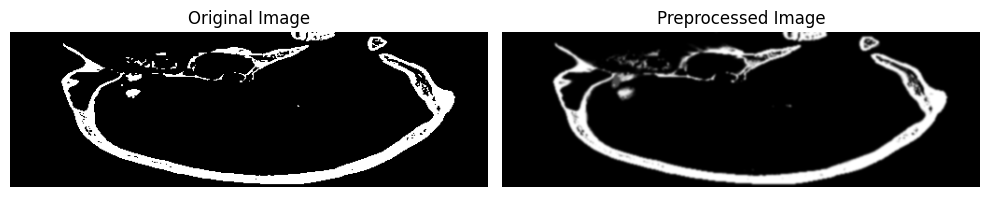

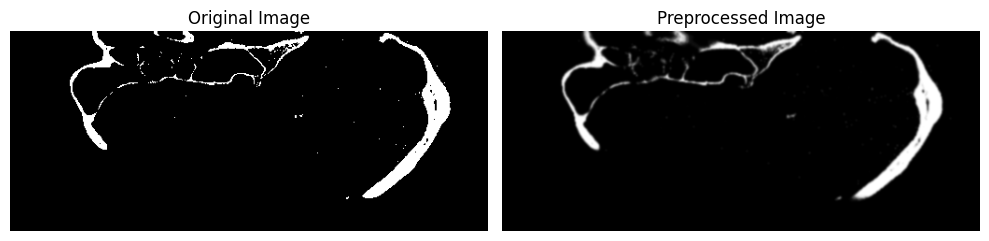

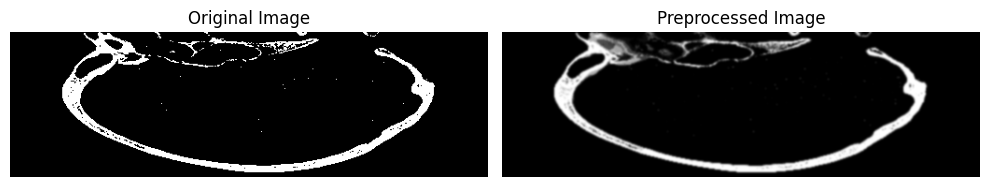

In [3]:
#PreProcessing of Images
import os
import matplotlib.pyplot as plt
import nibabel as nib
from skimage import filters, exposure
from skimage.transform import resize

def preprocess_image(image_path, target_size=(256, 256, 256)):
    # Step 1: Load the image
    image = nib.load(image_path).get_fdata()

    # Step 2: Resize the image to the target size
    resized_image = resize(image, target_size, mode='constant', anti_aliasing=True)

    # Step 3: Apply noise reduction using Gaussian blur
    denoised_image = filters.gaussian(resized_image, sigma=1)

    # Step 4: Normalize the pixel intensities to the range [0, 1]
    normalized_image = exposure.rescale_intensity(denoised_image)

    return normalized_image

# Set the directory containing your dataset
dataset_dir = 'content/sample_data/output'

# Get the list of image files in the dataset directory
image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.nii') or f.endswith('.nii.gz')]

# Create a directory to save the preprocessed images
output_dir = 'content/sample_data/preprocessed'
os.makedirs(output_dir, exist_ok=True)

# Loop over each image file in the dataset
for image_file in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(dataset_dir, image_file)

    # Load the original image to get its size
    original_image = nib.load(image_path).get_fdata()
    original_size = original_image.shape

    # Preprocess the image
    preprocessed_image = preprocess_image(image_path, target_size=original_size)

    # Save the preprocessed image
    output_path = os.path.join(output_dir, image_file)
    nib.save(nib.Nifti1Image(preprocessed_image, affine=nib.load(image_path).affine), output_path)

    # Display the original and preprocessed images (optional)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(nib.load(image_path).get_fdata()[:, :, original_size[2]//2], cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(preprocessed_image[:, :, original_size[2]//2], cmap='gray')
    axes[1].set_title('Preprocessed Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, filters, morphology, measure, exposure
from skimage.feature import graycomatrix, graycoprops
from skimage.transform import resize

In [5]:
def extract_features(image):
    # Pixel Intensity Statistics
    intensity_mean = np.mean(image)
    intensity_std = np.std(image)

    # Geometric Features
    contours = measure.find_contours(image, 0.8)
    num_contours = len(contours)

    # Texture Analysis using Gray Level Co-occurrence Matrix (GLCM)
    glcm = graycomatrix((image * 255).astype(np.uint8), [1], [0], 256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

    # Edge Detection using Canny Edge Detector
    edges = feature.canny(image)

    return intensity_mean, intensity_std, num_contours, contrast, energy, correlation, homogeneity, edges

In [6]:
# Set the directory containing your dataset
dataset_dir = 'content/sample_data/preprocessed'

In [7]:
# Get the list of image files in the dataset directory
image_files = os.listdir(dataset_dir)

In [8]:
# Create a directory to save the extracted features
!mkdir content\sample_data\extracted_features
output_dir = 'content/sample_data/extracted_features'
os.makedirs(output_dir, exist_ok=True)

A subdirectory or file content\sample_data\extracted_features already exists.


Image: B0001.nii
Pixel Intensity Statistics:
Mean Intensity: 0.02469588224670984
Standard Deviation: 0.12544514910789825

Geometric Features:
Number of Contours: 32

Texture Analysis:
Contrast: 111.46329656862748
Energy: 0.9257889468590697
Correlation: 0.9454263041204759
Homogeneity: 0.9329428092381857



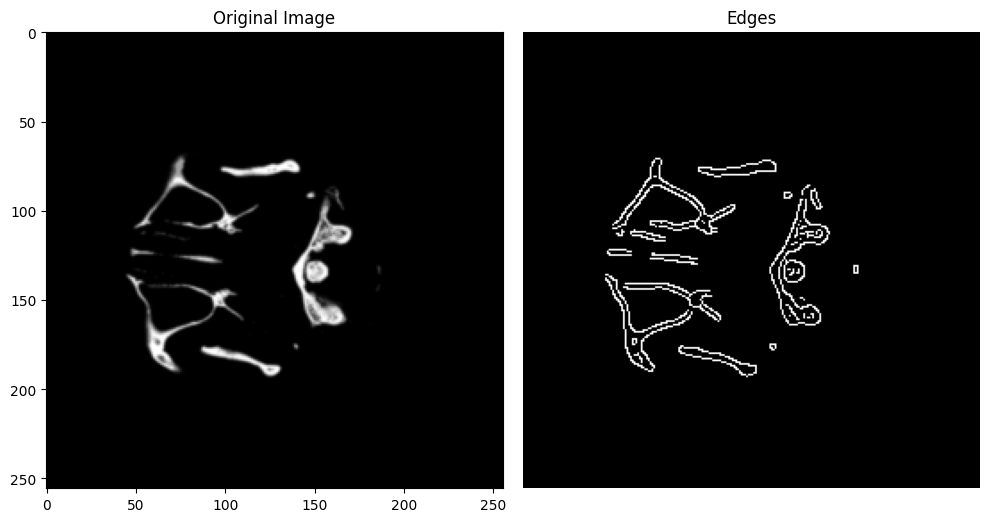

Image: B0002.nii
Pixel Intensity Statistics:
Mean Intensity: 0.01921405067860362
Standard Deviation: 0.10446324532941652

Geometric Features:
Number of Contours: 33

Texture Analysis:
Contrast: 101.55603553921566
Energy: 0.9297559339353244
Correlation: 0.9282518279942269
Homogeneity: 0.9366902562780115



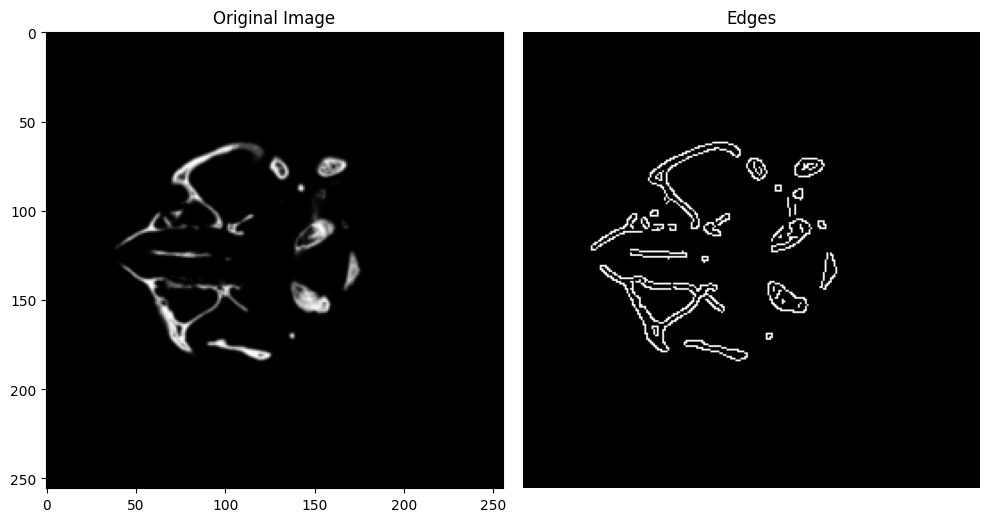

Image: B0003.nii
Pixel Intensity Statistics:
Mean Intensity: 8.91009077920556e-06
Standard Deviation: 0.0006057550417843195

Geometric Features:
Number of Contours: 0

Texture Analysis:
Contrast: 0.008946078431372552
Energy: 0.9996783105840484
Correlation: 0.8007800507146674
Homogeneity: 0.9997324793354773



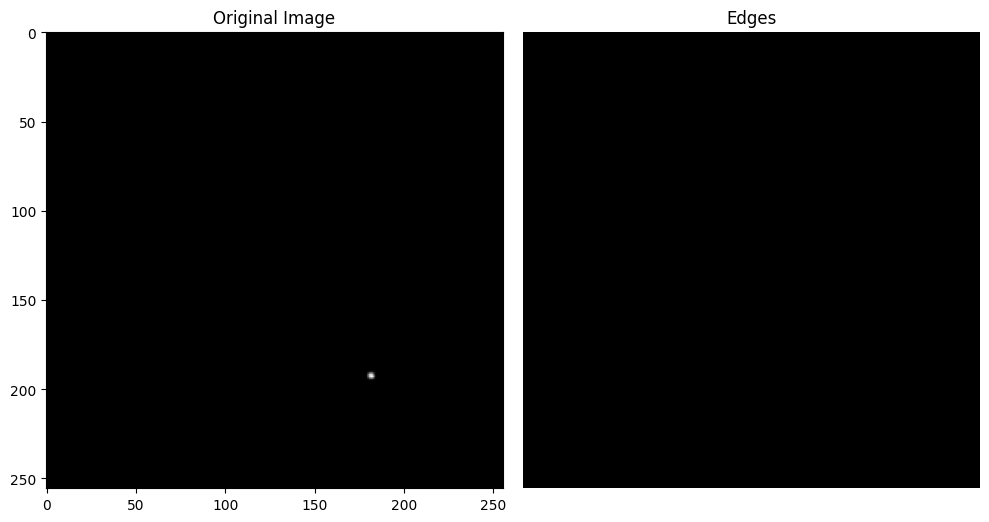

Image: B0004.nii
Pixel Intensity Statistics:
Mean Intensity: 0.06162524547988065
Standard Deviation: 0.21451370016082394

Geometric Features:
Number of Contours: 45

Texture Analysis:
Contrast: 178.21305147058825
Energy: 0.8899317818019727
Correlation: 0.9701765218100259
Homogeneity: 0.9049045278452686



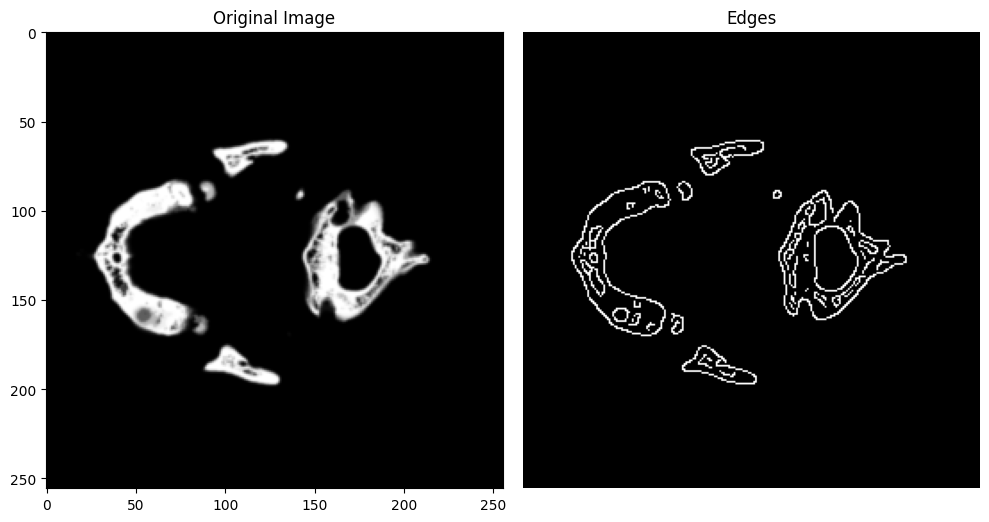

Image: B0005.nii
Pixel Intensity Statistics:
Mean Intensity: 0.02660380114237011
Standard Deviation: 0.12723415561204265

Geometric Features:
Number of Contours: 50

Texture Analysis:
Contrast: 149.33606004901955
Energy: 0.9121955163596799
Correlation: 0.928911387665936
Homogeneity: 0.9209317576069811



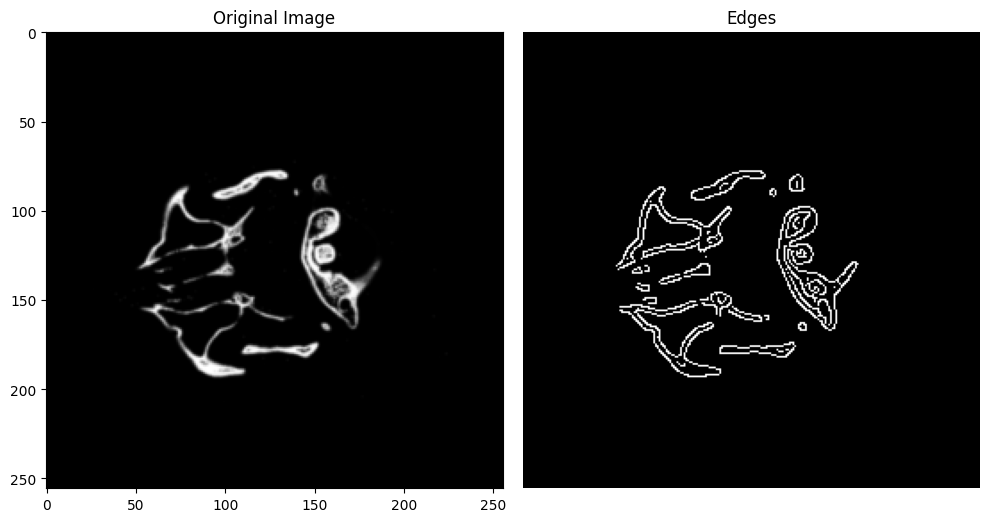

Image: B0006.nii
Pixel Intensity Statistics:
Mean Intensity: 0.02404114573927541
Standard Deviation: 0.118468015107044

Geometric Features:
Number of Contours: 38

Texture Analysis:
Contrast: 111.88020833333337
Energy: 0.9264295788452864
Correlation: 0.9385557777133304
Homogeneity: 0.9318186660596993



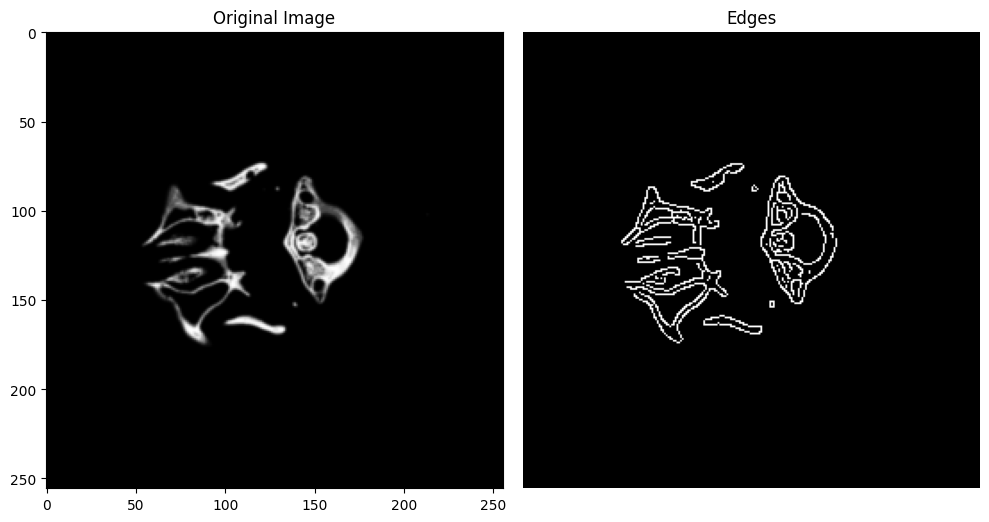

Image: B0007.nii
Pixel Intensity Statistics:
Mean Intensity: 0.02856448450174115
Standard Deviation: 0.14058161677259945

Geometric Features:
Number of Contours: 40

Texture Analysis:
Contrast: 157.12898284313724
Energy: 0.9247313489031924
Correlation: 0.9387608847363885
Homogeneity: 0.9320977525065407



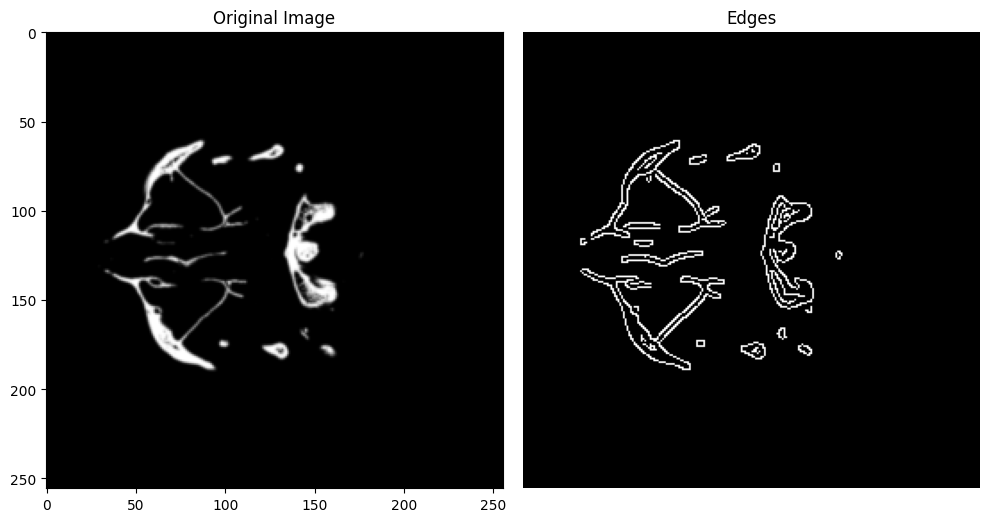

Image: B0008.nii
Pixel Intensity Statistics:
Mean Intensity: 0.02481935976753377
Standard Deviation: 0.11970156885000341

Geometric Features:
Number of Contours: 41

Texture Analysis:
Contrast: 116.82092524509807
Energy: 0.9108128482671786
Correlation: 0.9371606614551362
Homogeneity: 0.91980444979139



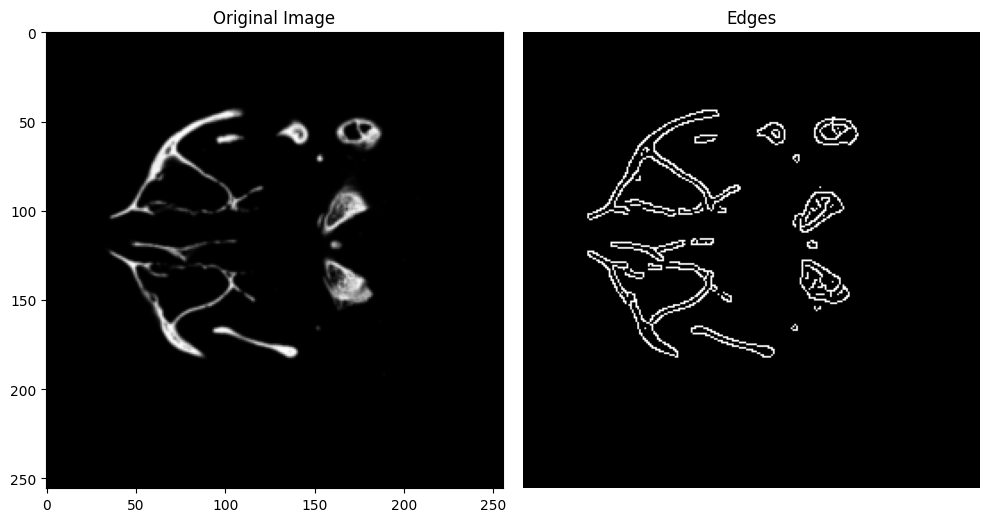

Image: B0009.nii
Pixel Intensity Statistics:
Mean Intensity: 0.031052591265287307
Standard Deviation: 0.13945908453996142

Geometric Features:
Number of Contours: 35

Texture Analysis:
Contrast: 134.69350490196078
Energy: 0.9058303700877088
Correlation: 0.9466392786531684
Homogeneity: 0.9149484199059128



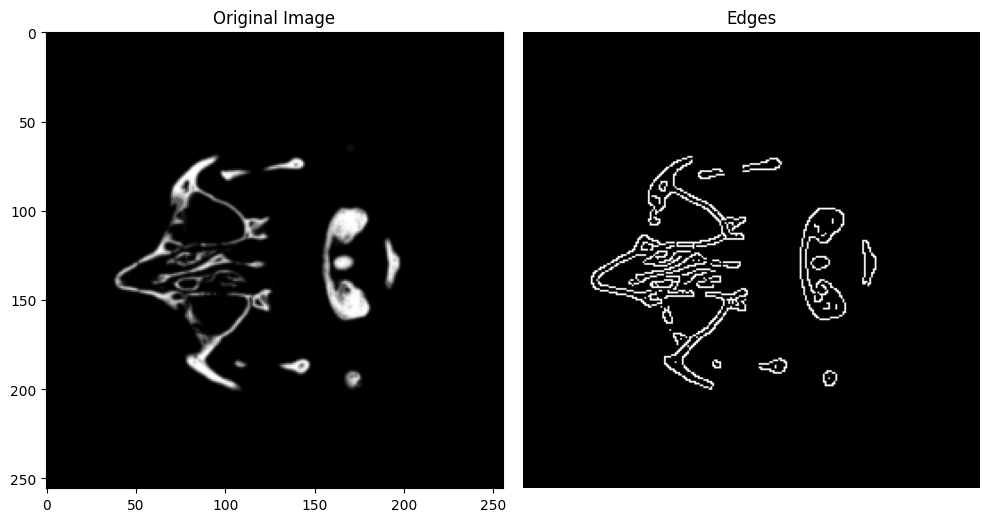

Image: B0010.nii
Pixel Intensity Statistics:
Mean Intensity: 0.04807036117918092
Standard Deviation: 0.1974013478842882

Geometric Features:
Number of Contours: 22

Texture Analysis:
Contrast: 146.39108455882354
Energy: 0.9200949269766255
Correlation: 0.9710558217120785
Homogeneity: 0.940517674402562



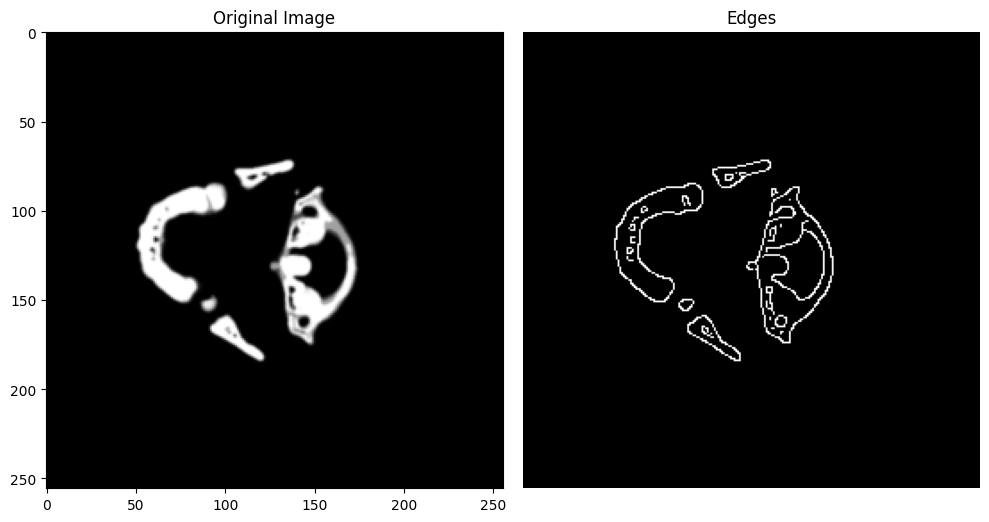

Image: B0011.nii
Pixel Intensity Statistics:
Mean Intensity: 0.036696921576162424
Standard Deviation: 0.15435758568966587

Geometric Features:
Number of Contours: 56

Texture Analysis:
Contrast: 152.07273284313723
Energy: 0.9040844842726775
Correlation: 0.9508330498503454
Homogeneity: 0.9137811980249759



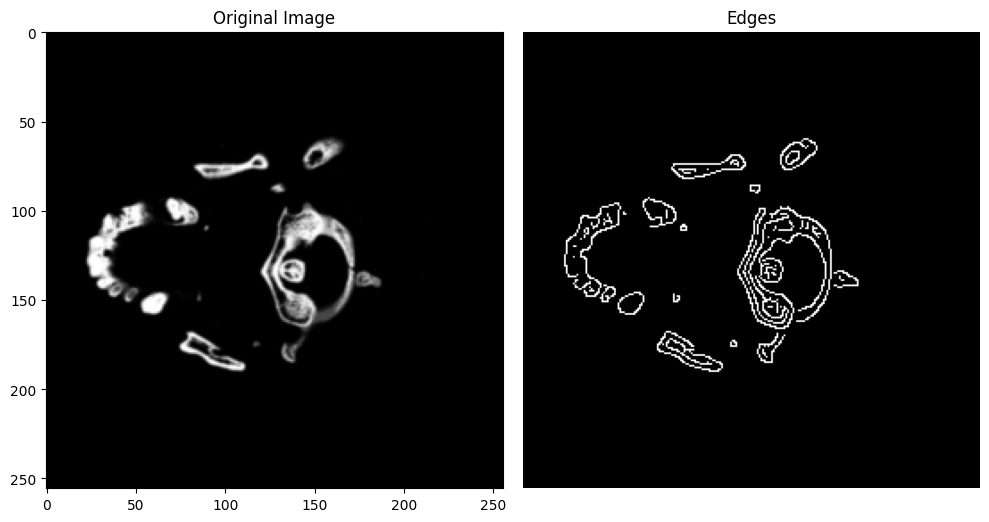

Image: B0012.nii
Pixel Intensity Statistics:
Mean Intensity: 0.02838671140430878
Standard Deviation: 0.13108276430025587

Geometric Features:
Number of Contours: 40

Texture Analysis:
Contrast: 137.92463235294113
Energy: 0.910334615638201
Correlation: 0.9381553670330803
Homogeneity: 0.9183345890528098



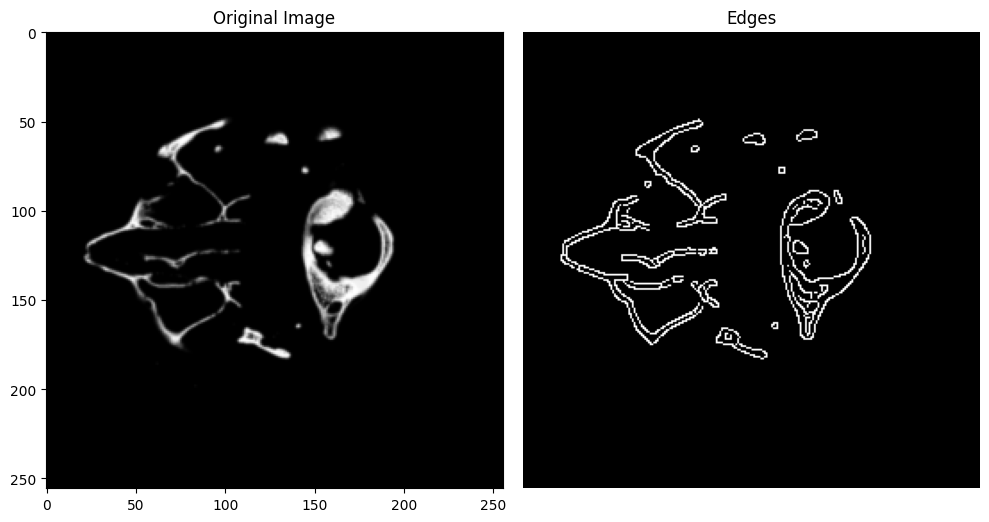

Image: B0013.nii
Pixel Intensity Statistics:
Mean Intensity: 0.034101694588733224
Standard Deviation: 0.14532129332600136

Geometric Features:
Number of Contours: 46

Texture Analysis:
Contrast: 167.33045343137258
Energy: 0.9004827824070925
Correlation: 0.9389503000723863
Homogeneity: 0.9092238818348912



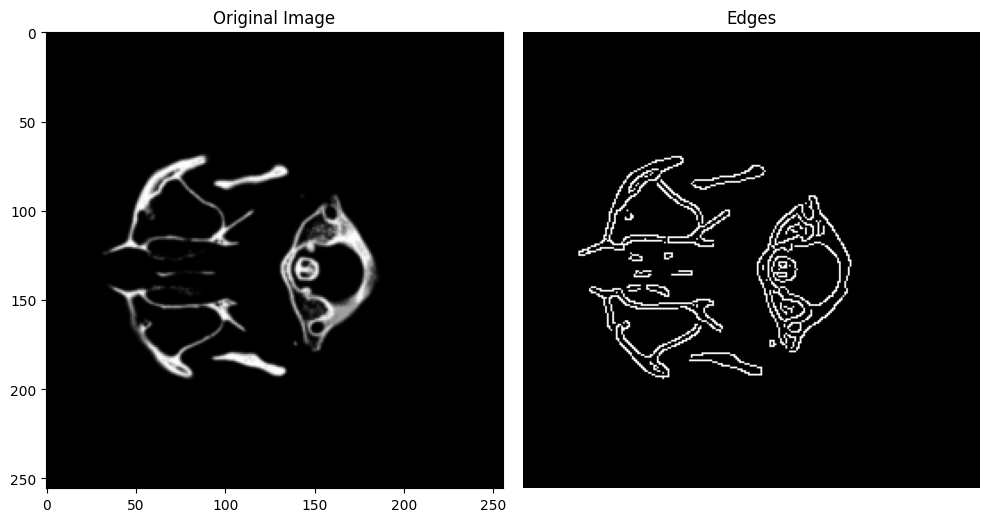

Image: B0014.nii
Pixel Intensity Statistics:
Mean Intensity: 0.03163468466666819
Standard Deviation: 0.13443173521191515

Geometric Features:
Number of Contours: 58

Texture Analysis:
Contrast: 101.73223039215686
Energy: 0.903562795883506
Correlation: 0.9566050134919163
Homogeneity: 0.9137040652566963



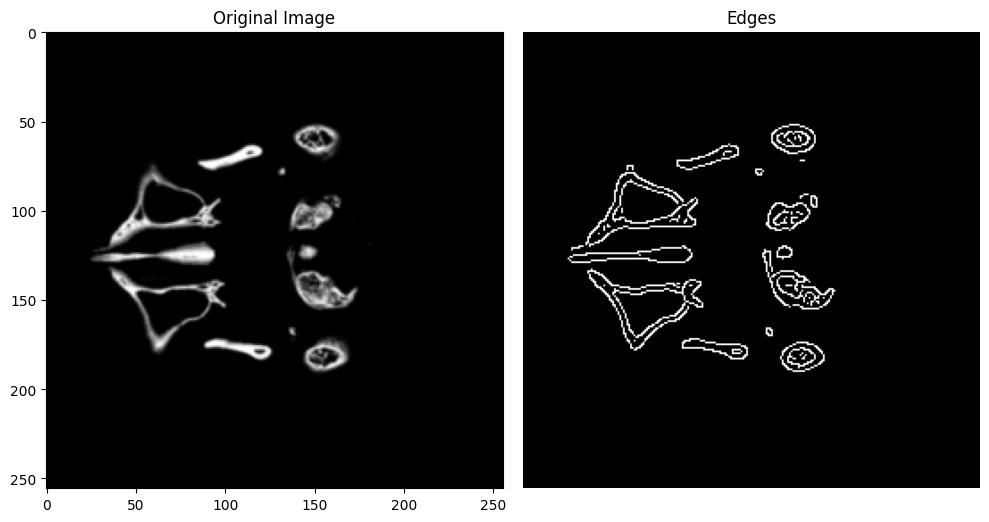

Image: B0015.nii
Pixel Intensity Statistics:
Mean Intensity: 0.034740687529223276
Standard Deviation: 0.1513921510280194

Geometric Features:
Number of Contours: 46

Texture Analysis:
Contrast: 157.86418504901965
Energy: 0.9027148356134969
Correlation: 0.9469446067630809
Homogeneity: 0.9131087279860362



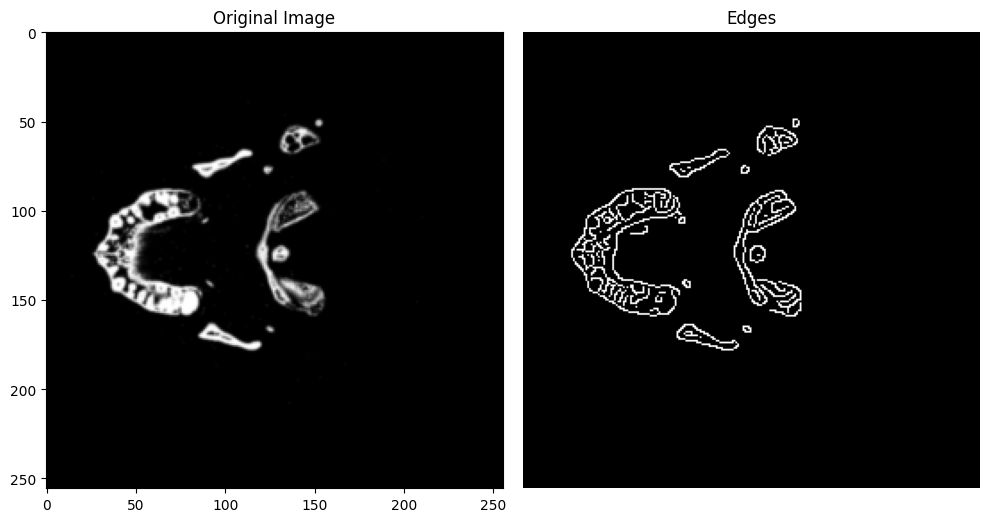

Image: B0016.nii
Pixel Intensity Statistics:
Mean Intensity: 2.1470532915702267e-07
Standard Deviation: 1.2325170678711198e-06

Geometric Features:
Number of Contours: 0

Texture Analysis:
Contrast: 0.0
Energy: 1.0
Correlation: 1.0
Homogeneity: 1.0



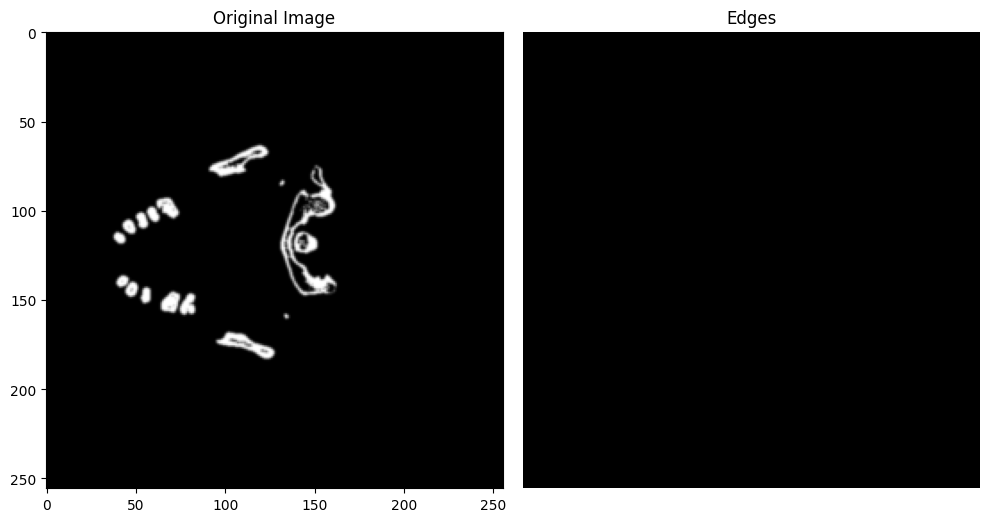

Image: B0017.nii
Pixel Intensity Statistics:
Mean Intensity: 0.012175255051203596
Standard Deviation: 0.08476011929844517

Geometric Features:
Number of Contours: 24

Texture Analysis:
Contrast: 59.26148897058824
Energy: 0.9537753776542186
Correlation: 0.9364236890290096
Homogeneity: 0.9604433146269187



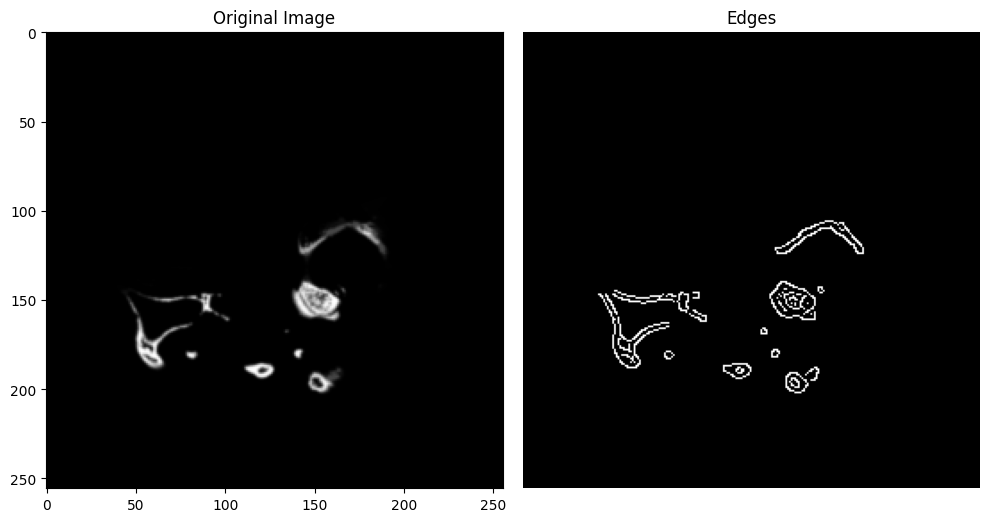

Image: B0018.nii
Pixel Intensity Statistics:
Mean Intensity: 0.019005762999008798
Standard Deviation: 0.10702170544335622

Geometric Features:
Number of Contours: 35

Texture Analysis:
Contrast: 114.20762867647059
Energy: 0.9337071828298268
Correlation: 0.923163042309639
Homogeneity: 0.9394385101317464



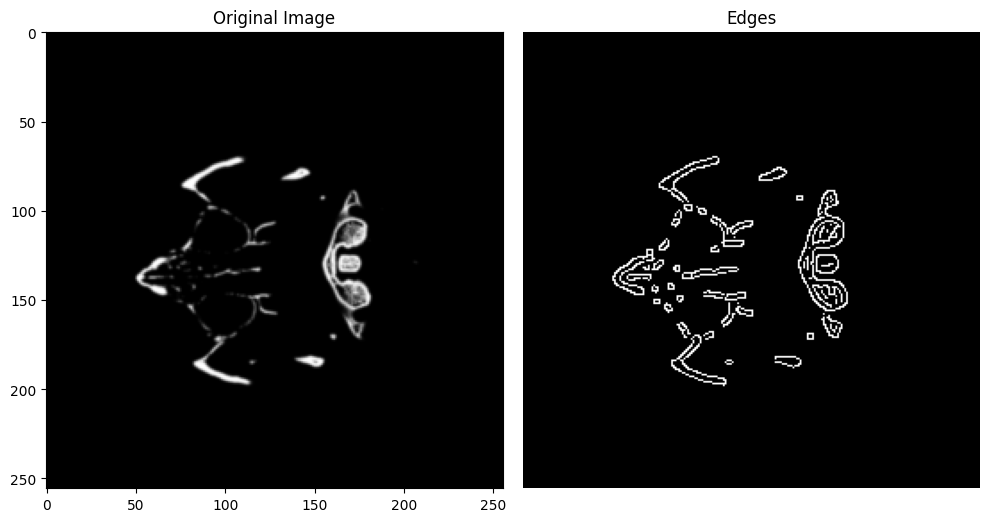

Image: B0019.nii
Pixel Intensity Statistics:
Mean Intensity: 0.03724628739482329
Standard Deviation: 0.15182552336511643

Geometric Features:
Number of Contours: 54

Texture Analysis:
Contrast: 139.00759803921568
Energy: 0.9021972887976614
Correlation: 0.9535356075136184
Homogeneity: 0.9106022443239445



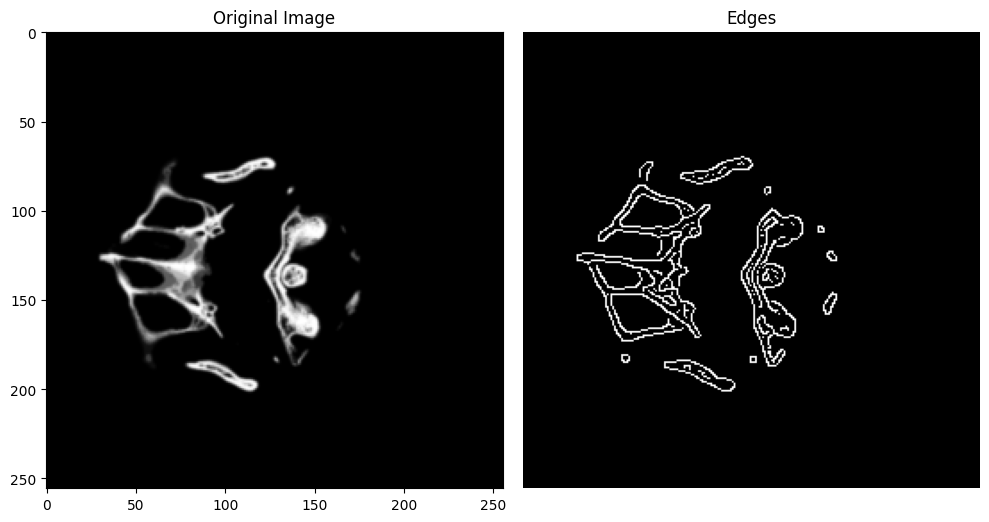

Image: B0020.nii
Pixel Intensity Statistics:
Mean Intensity: 0.025438484659460883
Standard Deviation: 0.11798627359219961

Geometric Features:
Number of Contours: 44

Texture Analysis:
Contrast: 86.77300857843139
Energy: 0.9198583331527315
Correlation: 0.951942221897799
Homogeneity: 0.9271438927507358



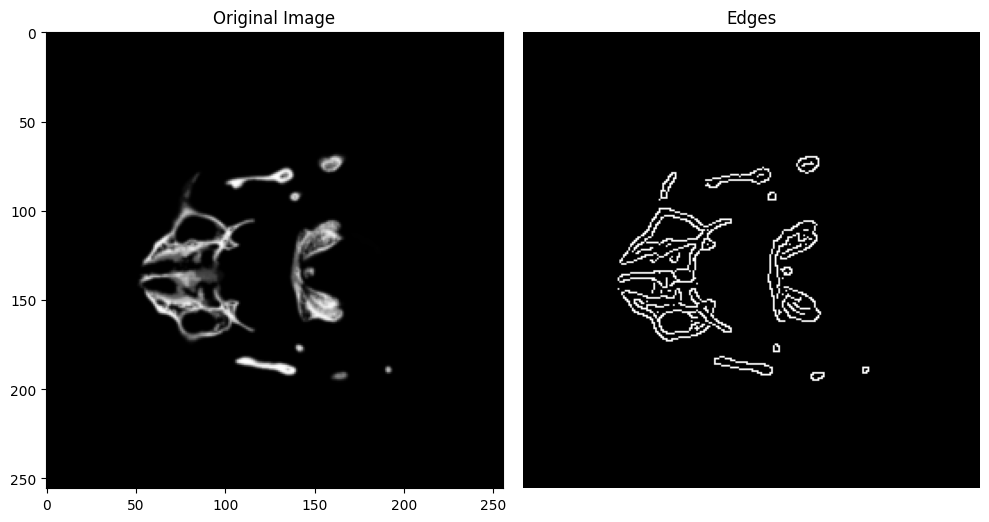

Image: B0021.nii
Pixel Intensity Statistics:
Mean Intensity: 0.035138676847865535
Standard Deviation: 0.15584860657982263

Geometric Features:
Number of Contours: 34

Texture Analysis:
Contrast: 138.48691789215684
Energy: 0.9044252703725671
Correlation: 0.9560815062309188
Homogeneity: 0.9165785505455567



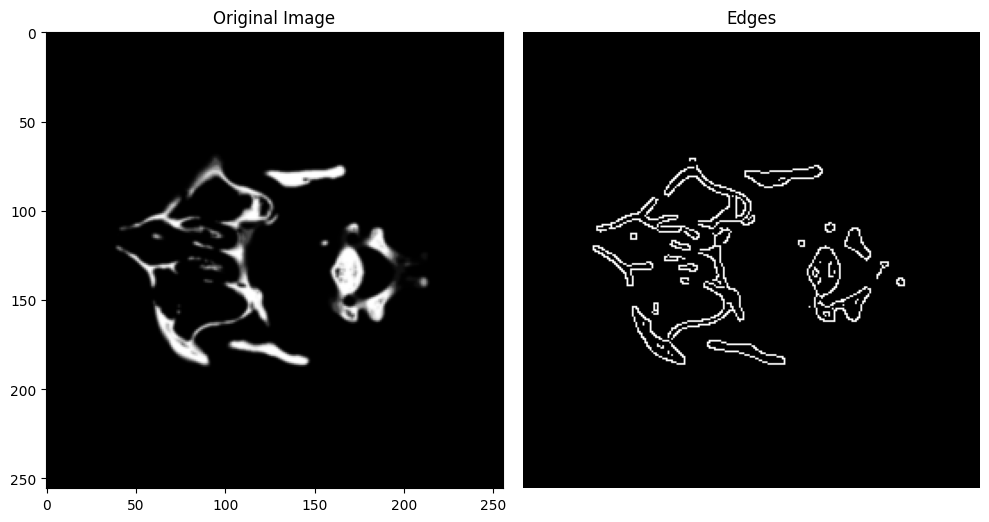

Image: B0022.nii
Pixel Intensity Statistics:
Mean Intensity: 0.03413136480162
Standard Deviation: 0.14649727884510097

Geometric Features:
Number of Contours: 47

Texture Analysis:
Contrast: 157.85719975490196
Energy: 0.9031815868053767
Correlation: 0.9433337315254122
Homogeneity: 0.9123790128254855



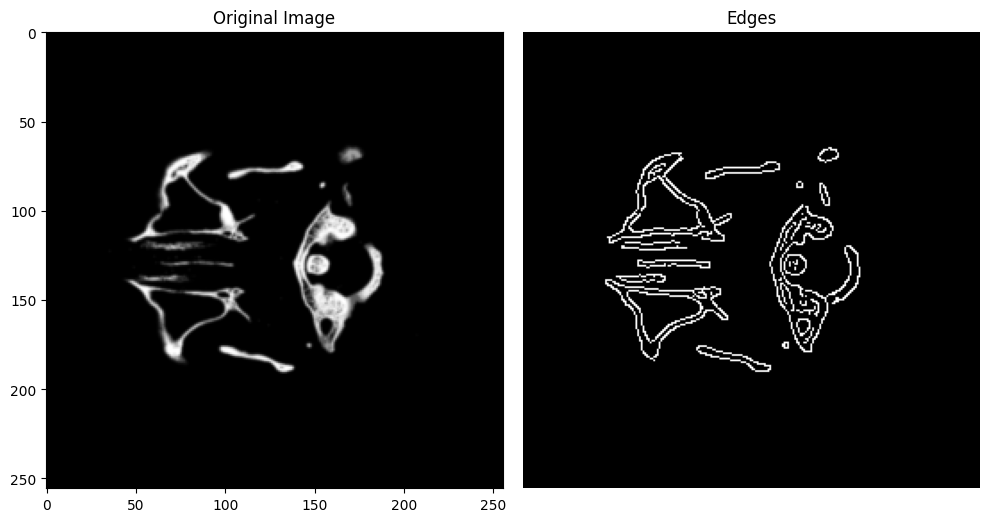

Image: B0023.nii
Pixel Intensity Statistics:
Mean Intensity: 0.03158579622371055
Standard Deviation: 0.1481477360333424

Geometric Features:
Number of Contours: 43

Texture Analysis:
Contrast: 162.62564338235296
Energy: 0.9164306362989741
Correlation: 0.942933318615672
Homogeneity: 0.9246487116897384



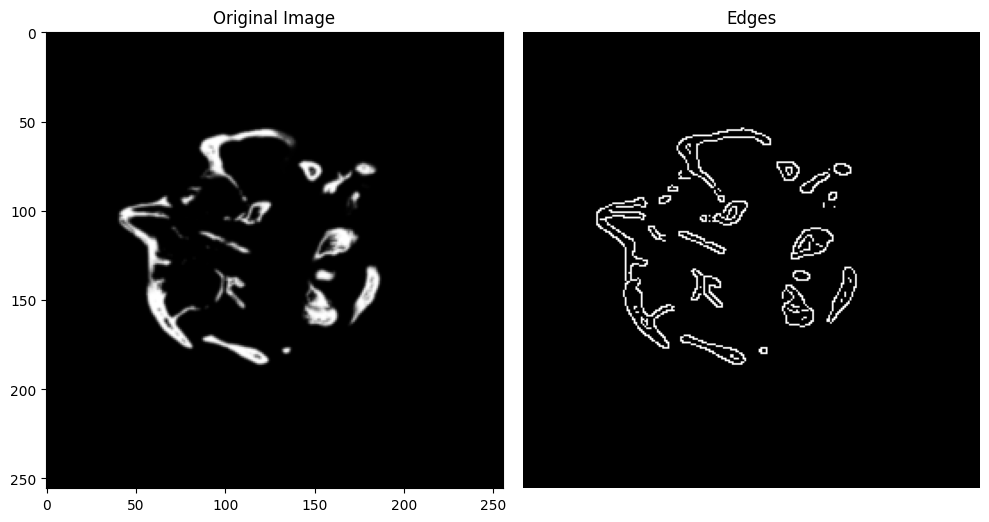

Image: B0024.nii
Pixel Intensity Statistics:
Mean Intensity: 0.019059310477681255
Standard Deviation: 0.09566314656958778

Geometric Features:
Number of Contours: 48

Texture Analysis:
Contrast: 120.46859681372551
Energy: 0.9198596498118357
Correlation: 0.8983977537138881
Homogeneity: 0.92694132013899



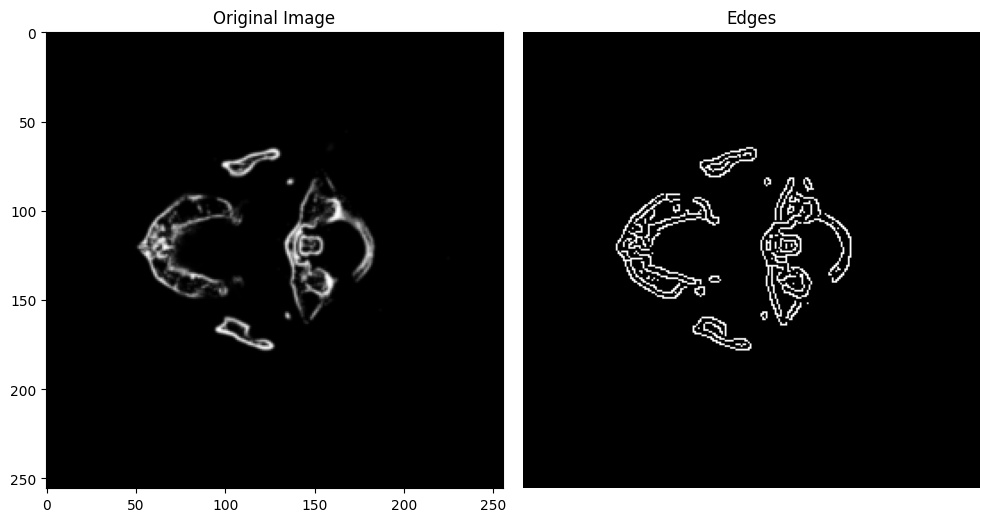

Image: B0025.nii
Pixel Intensity Statistics:
Mean Intensity: 0.014380266684081648
Standard Deviation: 0.08771098419290649

Geometric Features:
Number of Contours: 26

Texture Analysis:
Contrast: 74.11629901960785
Energy: 0.939375828132393
Correlation: 0.9256976427423362
Homogeneity: 0.9454070421403263



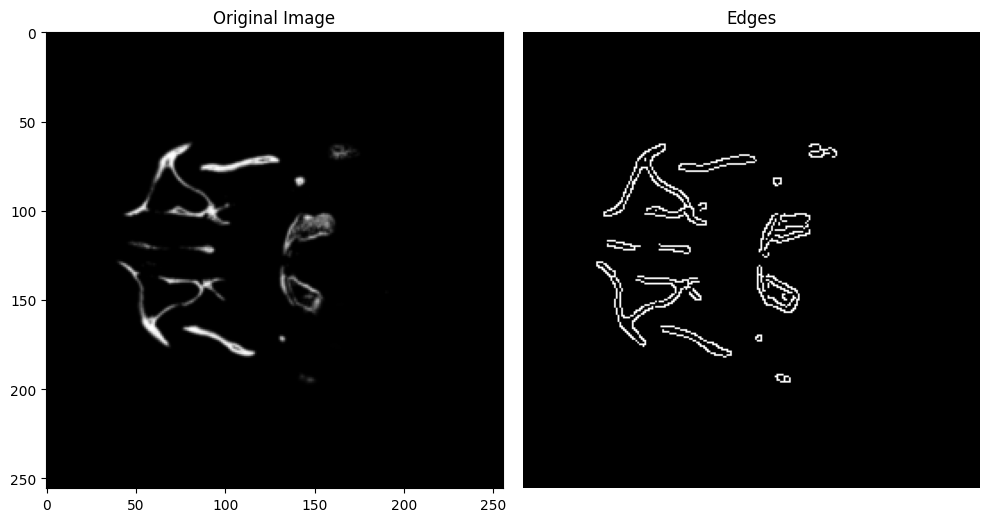

Image: B0026.nii
Pixel Intensity Statistics:
Mean Intensity: 0.044301222801453155
Standard Deviation: 0.1678301663995737

Geometric Features:
Number of Contours: 62

Texture Analysis:
Contrast: 162.4337316176471
Energy: 0.8916913123075522
Correlation: 0.9555764308970511
Homogeneity: 0.9024347475050859



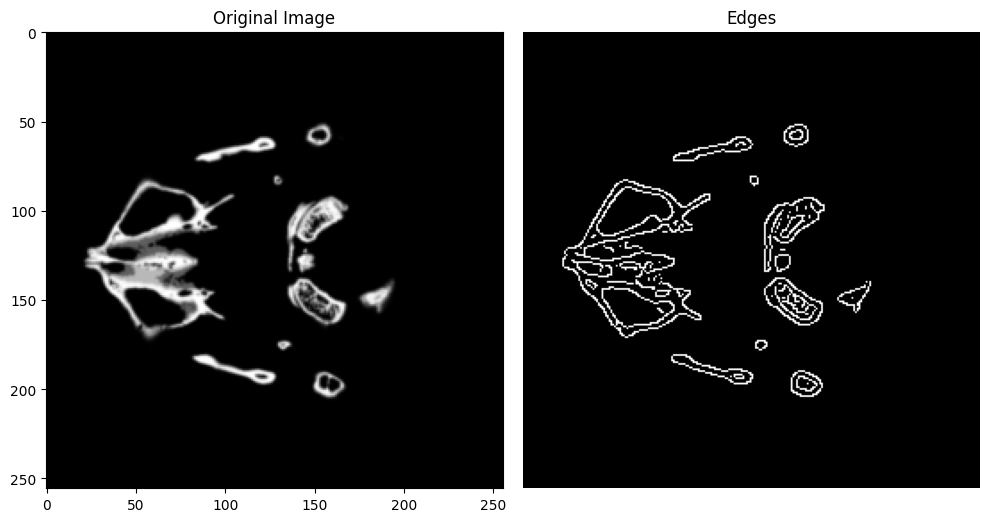

Image: B0027.nii
Pixel Intensity Statistics:
Mean Intensity: 0.03267619733118581
Standard Deviation: 0.14098714104368132

Geometric Features:
Number of Contours: 74

Texture Analysis:
Contrast: 172.65358455882355
Energy: 0.902139323158701
Correlation: 0.9330734000991328
Homogeneity: 0.9113292698321046



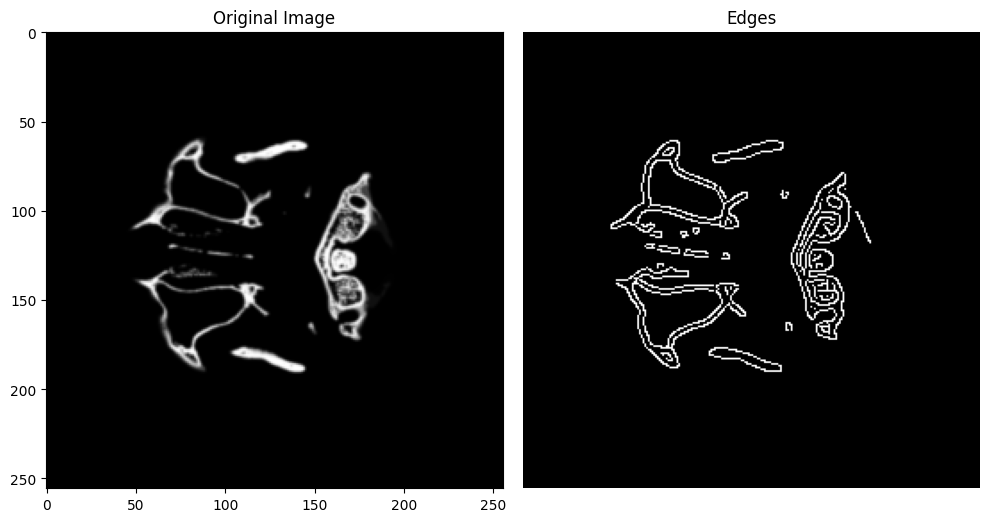

Image: B0028.nii
Pixel Intensity Statistics:
Mean Intensity: 0.03850781810857368
Standard Deviation: 0.15087801523216957

Geometric Features:
Number of Contours: 73

Texture Analysis:
Contrast: 201.47766544117653
Energy: 0.880011864805813
Correlation: 0.9318030964799228
Homogeneity: 0.8905949644349181



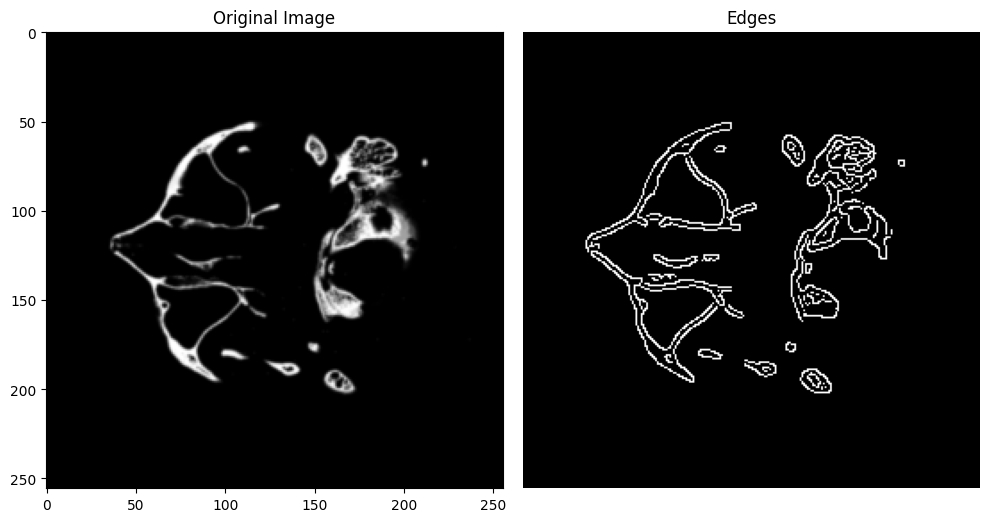

Image: B0029.nii
Pixel Intensity Statistics:
Mean Intensity: 0.03103877408578038
Standard Deviation: 0.13203221511492597

Geometric Features:
Number of Contours: 75

Texture Analysis:
Contrast: 157.10949754901964
Energy: 0.8960593935280958
Correlation: 0.9305202168800365
Homogeneity: 0.9057989596156742



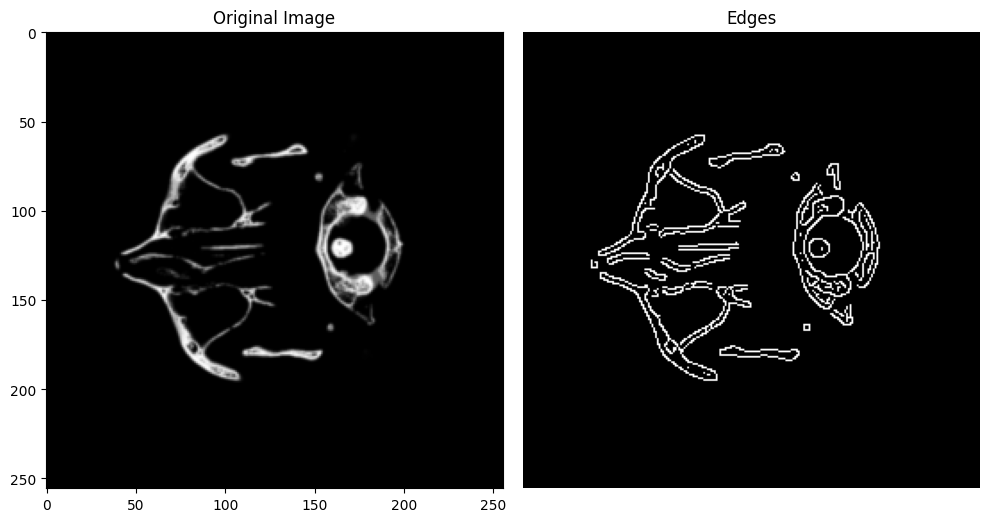

In [9]:
# Loop over each image file in the dataset
labels=[]
for image_file in image_files:
    # Construct the full path to the image file
    image_path = os.path.join(dataset_dir, image_file)

    # Load the image
    image = io.imread(image_path)[:,:,:3]

    # Convert the RGB image to grayscale
    grayscale_image = color.rgb2gray(image)

    # Resize the grayscale image if necessary
    resized_image = resize(grayscale_image, (256, 256))

    # Extract features from the image
    features = extract_features(resized_image)
    labels.append(features[:7])

    # Save the extracted features as a numpy array
    output_path = os.path.join(output_dir, f"{image_file}.npy")
#     np.save(output_path, features)

    # Print the extracted features
    print("Image:", image_file)
    print("Pixel Intensity Statistics:")
    print("Mean Intensity:", features[0])
    print("Standard Deviation:", features[1])
    print("")

    print("Geometric Features:")
    print("Number of Contours:", features[2])
    print("")

    print("Texture Analysis:")
    print("Contrast:", features[3])
    print("Energy:", features[4])
    print("Correlation:", features[5])
    print("Homogeneity:", features[6])
    print("")

    # Display the original image and edges (optional)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(resized_image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[1].axis('off')

    axes[1].imshow(features[-1], cmap='gray')
    axes[1].set_title('Edges')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
pip install SimpleITK

Note: you may need to restart the kernel to use updated packages.


In [11]:
labels

[(0.02469588224670984,
  0.12544514910789825,
  32,
  111.46329656862748,
  0.9257889468590697,
  0.9454263041204759,
  0.9329428092381857),
 (0.01921405067860362,
  0.10446324532941652,
  33,
  101.55603553921566,
  0.9297559339353244,
  0.9282518279942269,
  0.9366902562780115),
 (8.91009077920556e-06,
  0.0006057550417843195,
  0,
  0.008946078431372552,
  0.9996783105840484,
  0.8007800507146674,
  0.9997324793354773),
 (0.06162524547988065,
  0.21451370016082394,
  45,
  178.21305147058825,
  0.8899317818019727,
  0.9701765218100259,
  0.9049045278452686),
 (0.02660380114237011,
  0.12723415561204265,
  50,
  149.33606004901955,
  0.9121955163596799,
  0.928911387665936,
  0.9209317576069811),
 (0.02404114573927541,
  0.118468015107044,
  38,
  111.88020833333337,
  0.9264295788452864,
  0.9385557777133304,
  0.9318186660596993),
 (0.02856448450174115,
  0.14058161677259945,
  40,
  157.12898284313724,
  0.9247313489031924,
  0.9387608847363885,
  0.9320977525065407),
 (0.02481935

In [12]:
from sklearn.preprocessing import StandardScaler
X = []

for label in labels:
    X.append(np.array(label))

X

[array([2.46958822e-02, 1.25445149e-01, 3.20000000e+01, 1.11463297e+02,
        9.25788947e-01, 9.45426304e-01, 9.32942809e-01]),
 array([1.92140507e-02, 1.04463245e-01, 3.30000000e+01, 1.01556036e+02,
        9.29755934e-01, 9.28251828e-01, 9.36690256e-01]),
 array([8.91009078e-06, 6.05755042e-04, 0.00000000e+00, 8.94607843e-03,
        9.99678311e-01, 8.00780051e-01, 9.99732479e-01]),
 array([6.16252455e-02, 2.14513700e-01, 4.50000000e+01, 1.78213051e+02,
        8.89931782e-01, 9.70176522e-01, 9.04904528e-01]),
 array([2.66038011e-02, 1.27234156e-01, 5.00000000e+01, 1.49336060e+02,
        9.12195516e-01, 9.28911388e-01, 9.20931758e-01]),
 array([2.40411457e-02, 1.18468015e-01, 3.80000000e+01, 1.11880208e+02,
        9.26429579e-01, 9.38555778e-01, 9.31818666e-01]),
 array([2.85644845e-02, 1.40581617e-01, 4.00000000e+01, 1.57128983e+02,
        9.24731349e-01, 9.38760885e-01, 9.32097753e-01]),
 array([2.48193598e-02, 1.19701569e-01, 4.10000000e+01, 1.16820925e+02,
        9.10812848

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# X_pca

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset (X: feature data)
X = X_pca # Features as a 2D array

# Define a range of number of clusters to try
min_clusters = 2
max_clusters = 10

# Perform K-means clustering for different number of clusters
inertias = []
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    # Create a K-means clustering object
    kmeans = KMeans(n_clusters=n_clusters, n_init=30, random_state=42)

    # Perform clustering
    kmeans.fit(X)

    # Get inertia (sum of squared distances to the closest centroid)
    inertia = kmeans.inertia_
    inertias.append(inertia)

    # Get silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

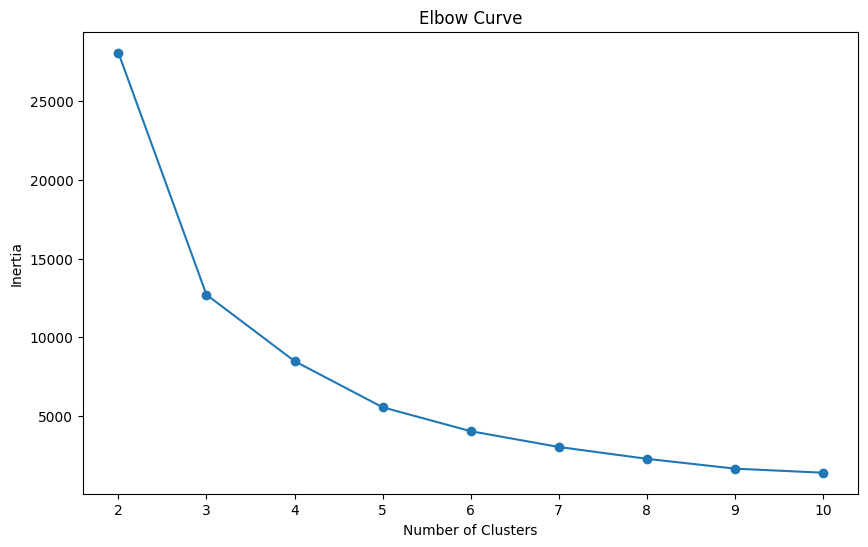

In [15]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

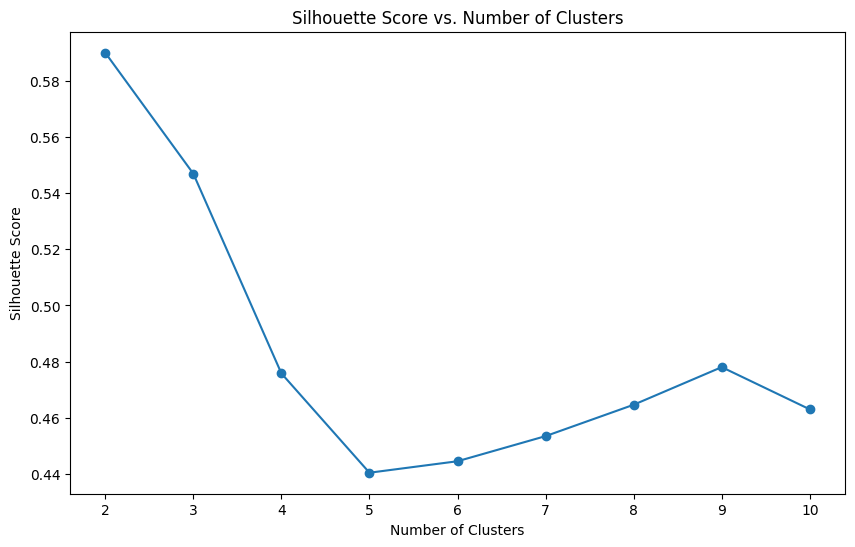

In [16]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [17]:
optimal_clusters = 3

In [18]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, n_init=30, random_state=42)
kmeans.fit(X)
labels__ = kmeans.labels_
labels__

array([2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0])

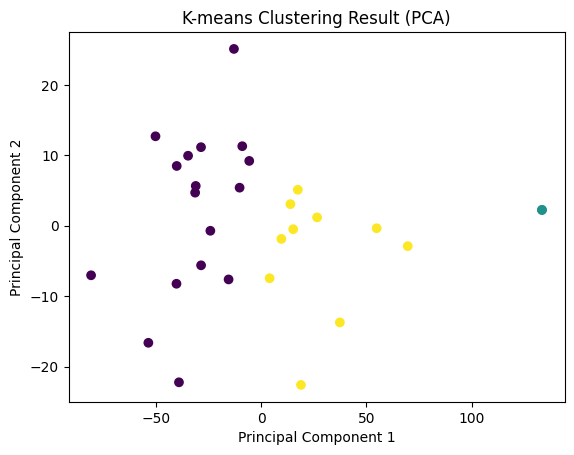

In [19]:
# cluster_centers
from sklearn.decomposition import PCA

# Get cluster centers
cluster_centers = kmeans.cluster_centers_



# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels__, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Result (PCA)')
plt.show()